基于原有地图，生成一张更大的地图并测试

读取原有地图

In [1]:
conf_file = "../23_12_22路径优化/main7_map_input.txt"

content_list = []
row = 0
with open(conf_file, "r") as f:
    content_list = f.readlines()
N, M, F, P = [int(i) for i in content_list[row].split()]
row += 1
G_matrix = [[0 for j in range(N)] for i in range(N)]
C_vector = [[0 for j in range(3)] for i in range(M)]
F_matrix = [[0 for j in range(F)] for i in range(F)]
I, J = [int(i) for i in content_list[row].split()]
row += 1
for i in range(N):
    G_matrix[i] = [int(j) for j in content_list[row].split()]
    row += 1
for i in range(M):
    C_vector[i] = [int(j) for j in content_list[row].split()]
    row += 1
for i in range(F):
    F_matrix[i] = [int(j) for j in content_list[row].split()]
    row += 1

新地图通过在周围padding来获得

In [2]:
# 上下左右分别加上固定单元格数，并填充特定值
padding = 2
padding_value = 10

new_N = N + 2*padding
new_M = M
new_F = F
new_P = P

new_I = I + padding
new_J = J + padding 
new_G_matrix = [[padding_value for j in range(new_N)] for i in range(new_N)]
new_C_vector = C_vector
new_F_matrix = F_matrix

for i in range(N):
    for j in  range(N):
        new_G_matrix[padding+i][padding+j] = G_matrix[i][j]

for i in range(new_M):
    new_C_vector[i][0] += padding
    new_C_vector[i][1] += padding

打印输入，手动保存

In [3]:
print(new_N, new_M, new_F, new_P)
print(new_I, new_J)
for i in range(new_N):
    for j in range(new_N):
        print(new_G_matrix[i][j], end=" ")
    print()
for i in range(new_M):
    for j in range(3):
        print(new_C_vector[i][j], end=" ")
    print()
for i in range(new_F):
    for j in range(new_F):
        print(new_F_matrix[i][j], end=" ")
    print()

9 3 2 10
4 5
10 10 10 10 10 10 10 10 10 
10 10 10 10 10 10 10 10 10 
10 10 20 15 10 10 10 10 10 
10 10 10 10 10 20 10 10 10 
10 10 10 15 10 90 10 10 10 
10 10 10 20 10 10 10 10 10 
10 10 10 10 10 10 10 10 10 
10 10 10 10 10 10 10 10 10 
10 10 10 10 10 10 10 10 10 
2 2 0 
5 3 0 
3 5 0 
0 10 
20 0 


准备测试

In [4]:
import sys
sys.path += ["../23_12_22路径优化/"]
from main11_map_BFS_early_stop import main as main_bfs
from main12_map_dijkstra_early_stop import main as main_dijkstra
from main7_map_visualization import visualization

In [5]:
def show_map(map):
    N = map.N

    for i in range(N):
        for j in range(N):
            node = map.node_matrix[i][j]
            print(node.distance, end=" ")
        print()

    print("==================================")
    for i in range(N):
        for j in range(N):
            node = map.node_matrix[i][j]
            if node.best_direction == "UP":
                print("↑", end=" ")
            elif node.best_direction == "RIGHT":
                print("→", end=" ")            
            elif node.best_direction == "DOWN":
                print("↓", end=" ")            
            elif node.best_direction == "LEFT":
                print("←", end=" ")
            else:
                print("U", end=" ")
        print()

测试BFS

1 5
2 3
3 1
2
4 5 2 0 1 0 1 3 0 
4 3 2 0 2 0 1 2 0 
4 2 1 1 1 0 


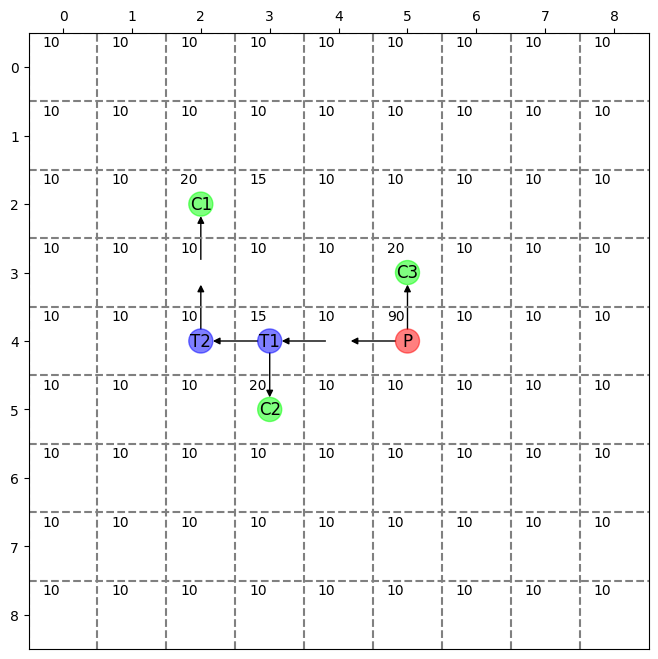

-1 -1 -1 6 5 6 5 6 -1 
-1 -1 6 5 4 5 4 5 6 
-1 -1 5 4 3 4 3 4 5 
-1 5 4 3 2 1 2 3 4 
5 4 3 2 1 0 1 2 3 
-1 5 4 3 2 1 2 3 4 
-1 6 5 4 3 2 3 4 5 
-1 -1 6 5 4 3 4 5 6 
-1 -1 -1 6 5 4 5 6 -1 
U U U ↓ ↓ ↓ ↓ ↓ U 
U U → ↓ ↓ ↓ ↓ ↓ ↓ 
U U ↓ ↓ ↓ ← ↓ ↓ ↓ 
U ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 
→ → → → → U ← ← ← 
U ↑ ↑ ↑ ↑ ↑ ← ← ← 
U → ↑ → ↑ ↑ ← ← ← 
U U ↑ ↑ ↑ ↑ ← ← ← 
U U U ↑ ↑ ↑ ← ← U 


In [6]:
map, provider, consumer_vector, transmitter_vector = main_bfs("main11_12_test_big_map.txt")
visualization(map, provider, consumer_vector, transmitter_vector)
show_map(map)

测试Dijkstra

1 60
2 40
3 20
4
4 5 2 0 1 0 1 3 0 
4 4 2 0 2 0 0 4 0 
3 4 1 0 3 0 
3 2 1 1 1 0 
5 4 1 1 2 0 


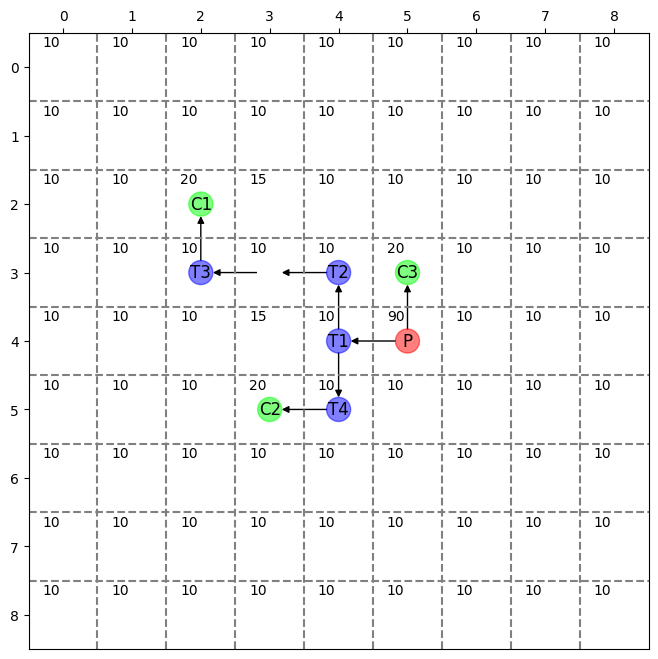

-1 -1 70 60 50 60 50 60 70 
-1 70 60 50 40 50 40 50 60 
70 60 60 45 30 40 30 40 50 
60 50 40 30 20 20 20 30 40 
55 45 35 25 10 0 10 20 30 
65 55 45 40 20 10 20 30 40 
-1 60 50 40 30 20 30 40 50 
-1 -1 60 50 40 30 40 50 60 
-1 -1 -1 60 50 40 50 60 -1 
U U → → ↓ ← ↓ ← ← 
U → → → ↓ ← ↓ ← ← 
→ ↓ ↓ → ↓ ← ↓ ← ← 
→ → → → ↓ ↓ ↓ ← ← 
→ → → → → U ← ← ← 
↑ ↑ ↑ → ↑ ↑ ↑ ↑ ↑ 
U → → → ↑ ↑ ↑ ↑ ↑ 
U U ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
U U U ↑ ↑ ↑ ↑ ↑ U 


In [7]:
map, provider, consumer_vector, transmitter_vector = main_dijkstra("main11_12_test_big_map.txt")
visualization(map, provider, consumer_vector, transmitter_vector)
show_map(map)